## DAV 6150 Module 7

### - individually completed by Qi Sun

***

## Introduction:


The purpose of this study is to predict if the mortgage application will be denied (dependent variable). The data was collected by Federal Reserve Bank of Boston from 1997-1998. This dataset is comprised of 2381 observations. 

<font color='blue'>**Variables:**</font>


| Variable Name | Description |
| --- | --- |
| dir | debt payments to total income ratio |
| hir | housing expenses to income ratio |
| lvr | ratio of size of loan to assessed value of property |
| ccs | consumer credit score from 1 to 6 (a low value being a good score) |
| mcs | mortgage credit score from 1 to 4 (a low value being a good score) |
| pbcr | public bad credit record ? |
| dmi | denied mortgage insurance ? |
| self | self employed ? |
| single | is the applicant single ?|
| uria | 1989 Massachusetts unemployment rate in the applicant's industry |
| condominium | is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package) |
| black | is the applicant black ? |
| deny (dependent variable) | mortgage application denied ? |


For the column 'black', I'll use African American for this column in this study.



<font color='blue'>**Domain Knowledge:**</font>



All features below could be the factors of the denied mortgage:

1. debt-to-income ratio (**dir**) is all the monthly debt payments divided by the gross monthly income. 

2. housing expenses to income ratio (**hir**) is the percentage of the gross monthly income devoted to housing expenses. The lender will likely deny the loan application because applicant monthly expenses for housing and various debts are too high as compared to applicant income.
https://www.quickenloans.com/mortgage-glossary/housing-expense-ratio


3. loan-to-value (**lvr**) ratio is an assessment of lending risk that financial institutions and other lenders examine before approving a mortgage. Typically, loan assessments with high loan-to-value ratios are considered higher risk loans. 
https://www.thebalance.com/loan-to-value-ratio-315629


4. consumer credit score (**ccs**) is one of the most important factors lenders consider when people apply for a mortgage. It is the #1 reason a mortgage gets denied.
https://www.bankrate.com/mortgages/how-your-credit-score-affects-your-mortgage-rate/


5. public bad credit record (**pbcr**) - public record appears on the credit report. Negative public records can include --tax liens, judgments, bankruptcies--that provide insight into applicant financial status and obligations. The lender will likely deny the mortgage application due to the bad public credit record.
https://www.usa.gov/credit-reports


6. denied mortgage insurance (**dmi**): borrowers making a down payment of less than 20 percent of the purchase price of the home will need to pay for mortgage insurance. Mortgage insurance can be denied due to a large collection account. If the mortgage insurance get denied, the only option for mortgage applicant is to put 20% down. 


7. is self employed (**self**)? for the self employed, it can be difficult to get a mortgage because the applicant may not have tax returns, W-2s, and paycheck stubs to prove the full amount.


8. is the applicant single (**single**)? because single mortgage applicants rely on one salary and one credit profile in order to secure a loan, getting through the underwriting process can be a bit trickier
https://www.investopedia.com/articles/investing/010717/buying-house-single-income.asp


9. **uria** is the probability of unemployment. With unemployment rising, the probability of a borrower could fall behind on their mortgages. 


10. is unit a condominium (**condominium**)? Appraisers divide condos into additional categories, which can affect mortgage approval and financing costs. Typically, lenders consider high-rise buildings bigger risks than shorter projects.
https://themortgagereports.com/24008/townhome-condo-how-your-property-type-affects-your-home-loan-approval


11. is the applicant black? Black applicants for a conventional mortgage are denied at more than twice the rate as white applicants.
https://www.zillow.com/research/black-white-mortgage-denials-19616/


According to Home Mortgage Disclosure Act data released by CoreLogic, top 8 reasons for denying mortgage applicantions include high debt-to-income (dir) ratios, low credit scores (ccs), Loan-to-value (lvr) ratio is too high / appraisal came back low, insufficient cash for down payment, denied mortgage insurance (dmi), credit application incomplete, unreliable information, and employment history.
https://themortgagereports.com/56676/top-two-reasons-mortgage-applications-denied-how-to-avoid-them





***

In [4]:
# Importing required libraries.
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


### Step 1: Load data 

`.head()` returns the first 5 rows of the dataset. 


In [5]:
# read data from Github
df = pd.read_csv("https://raw.githubusercontent.com/susanqisun/DAV-6150/master/assignments/M7/M7_Data.csv")

# To display the top 5 rows
df.head()


,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


***
### Step 2: Exploratory Data Analysis

#### 1. Data description:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (2381, 14), meaning the dataset has 2381 rows and 14 columns.

`.nunique(axis=0)` returns the number of unique values for each variable.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.isnull().sum()` returns the columns and the number of missing values.

In [6]:
print(df.shape)
print(list(df.columns))

(2381, 14)
['Unnamed: 0', 'dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'uria', 'comdominiom', 'black', 'deny']


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2381.0,1191.000000,687.479818,1.00,596.00000,1191.000000,1786.000000,2381.00
dir,2381.0,0.330814,0.107235,0.00,0.28000,0.330000,0.370000,3.00
hir,2381.0,0.255346,0.096635,0.00,0.21400,0.260000,0.298800,3.00
lvr,2381.0,0.737760,0.178715,0.02,0.65285,0.779412,0.868421,1.95
ccs,2381.0,2.116387,1.666370,1.00,1.00000,1.000000,2.000000,6.00
mcs,2381.0,1.721008,0.537169,1.00,1.00000,2.000000,2.000000,4.00
uria,2381.0,3.774496,2.026636,1.80,3.10000,3.200000,3.900000,10.60
comdominiom,2381.0,0.288114,0.452980,0.00,0.00000,0.000000,1.000000,1.00


In [8]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
Unnamed: 0,int64,2381,0,2381,0,0
dir,float64,520,0,2381,1,0
hir,float64,501,0,2381,3,0
lvr,float64,1538,0,2381,0,0
ccs,float64,7,0,2381,0,0
mcs,float64,5,0,2381,0,0
pbcr,object,2,1,2380,0,0
dmi,object,2,0,2381,0,0
self,object,2,1,2380,0,0
single,object,2,0,2381,0,0


#### Findings:
>1. The results above showed that the Mortgage dataset includes 2381 observations and 14 columns/variables. The independent variables include integer 64, float 64 and object data types, the dependent/response (deny) variable is string (yes/no) data type also known as an object.
2. There is one missing value in 'pbcr' and one missing value in 'self'. 
3. The categorical variables are pbcr, dmi, self, single, black, and deny (dependent variable).
4. The numerical variables are Unnamed: 0, dir, hir, lvr, ccs, mcs, uria, and comdominiom.
5. The column of 'Unnamed: 0' is meaningless in this dataset, and I'll delete this column later.
6. The variable of 'comdominiom' has two values (0 and 1), which indicates the mortgage is for condo or not. 


#### 2. Dropping irrelevant column

In [9]:
# drop 'Unnamed: 0'
df02 = df.drop(['Unnamed: 0'], axis=1)

#### 3. Check distribution

**3.1 Check distribution of numerical variables**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1201bdf90>,
      dtype=object)

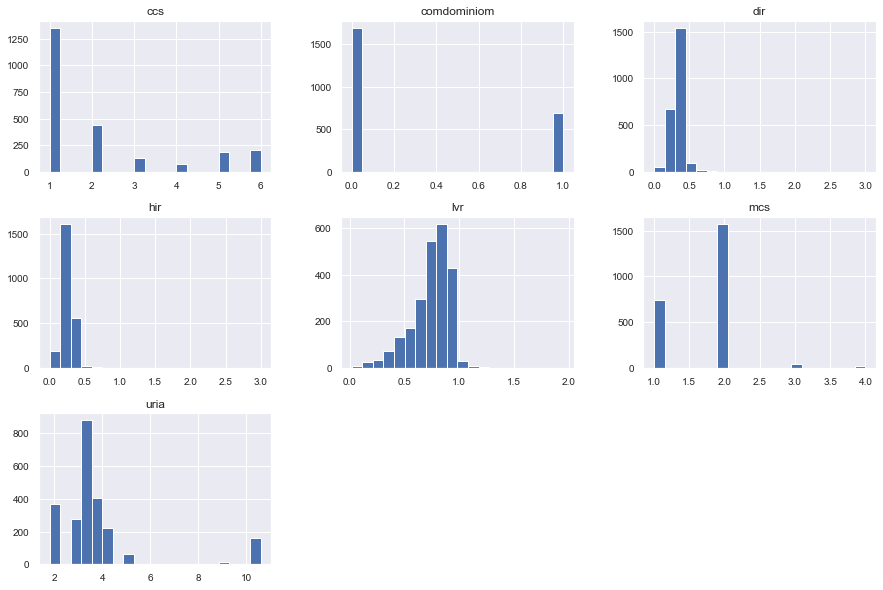

In [10]:
# Distributions for each of numerical variables.
df02.hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)


**3.2 Check distribution of categorical variables**

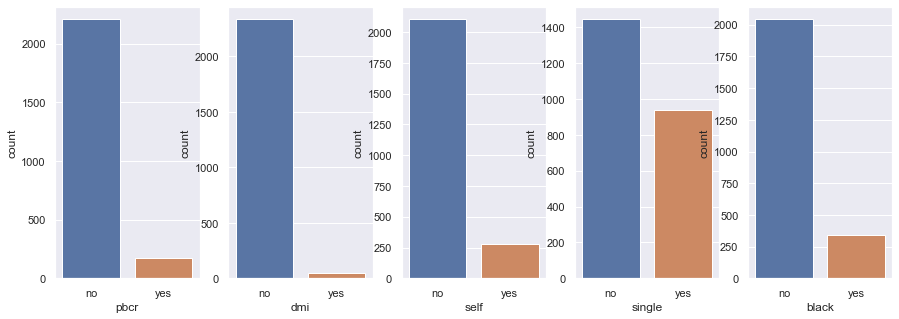

In [11]:
categorical_columns = ['pbcr', 'dmi', 'self', 'single', 'black']

# create the bar chart for each categorical columns
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df02[variable], ax=subplot)

**3.3 Check distribution of dependent variable**

Dependent variable: deny - the mortgage application denied? (binary: '1','0')

In [12]:
df02['deny'].value_counts()


no     2096
yes     285
Name: deny, dtype: int64

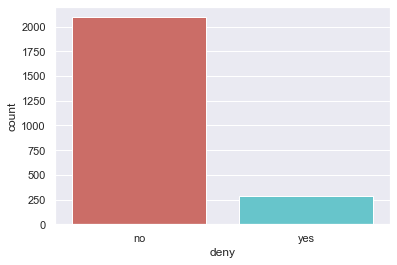

In [13]:
sns.countplot(x='deny',data=df02, palette='hls')
plt.show()

In [33]:
count_no_sub = len(df02[df02['deny']=='no'])
count_sub = len(df02[df02['deny']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no denied (approved) is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of denied", pct_of_sub*100)

percentage of no denied (approved) is 88.03023939521209
percentage of denied 11.969760604787904


#### Findings:
>1. Our classes are imbalanced, and the ratio of no-denied to denied instances is 88:12. I'll balance the classes later.
>2. From the distribution histograms above, all variables are not normal distribution.
>3. From the countplot of categorical variables, there are more cases with no public bad credit record, no denied mortgage insurance, not self employed, not a single, and not a black.
>4. All categorical variables have two values - no and yes. There's no outlier.

#### 4. Detect outliers


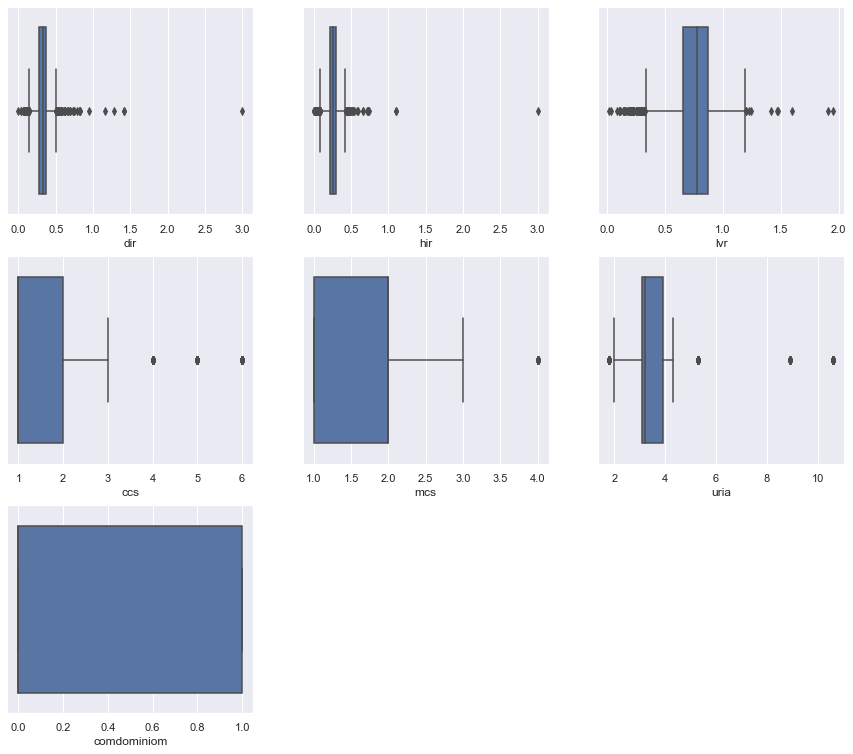

In [36]:
numerical_columns = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', 'comdominiom']

plt.figure(figsize=(15,13))

h=1
columns=df02[numerical_columns].columns.tolist()
for i in columns:   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(3,3,h) 
    sns.boxplot(x=i,data=df02)
    h=h+1 #add 1 to go to the next subplot space

#show results
plt.show()

#### Findings:
>1. For the variable of 'comdominiom', there are only two values - 0 (no) and 1 (yes). This variable should be categorical. 
2. For other six numerical variables, all of them have outliers. Since this study is to analyze the factors that can predict the denied mortgage, all outliers coule be useful in this case.

#### 5. Check  the correlation bewteen the numerical variables.

Text(0.5, 1.0, 'Figure: Correlations')

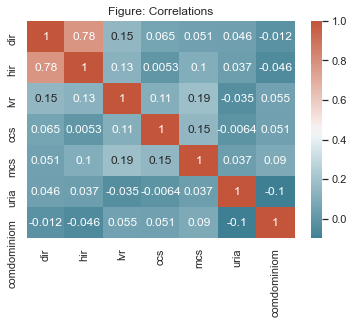

In [15]:
corr = df02.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure: Correlations')


For the original dataset, there's no correlation coefficient greater than 0.8. I'll use an absolute correlation coefficient of >0.7 among two or more predictors to indicate the presence of multicollinearity.

***

### Step 3: Data Preparation

#### 1. Handle the missing values

There is one missing value in 'pbcr' and one missing value in 'self'. Since the number is very small, we'll remove the rows with missing values. 


In [46]:
# make a copy
df03 = df02.copy()
print(df02.shape)

(2381, 13)


In [47]:
# drop rows with missing values
df03.dropna(inplace=True)
print(df03.shape)

(2380, 13)


In [48]:
# check the missing
df03.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

Only one row has been removed from the dataset.

#### 2. Correct data format of 'comdominiom'

The 'comdominiom' column has the value of 0 and 1, meaning no/yes. I'll change the data type of this column.

In [49]:
# change column name
df04 = df03.rename(columns={'comdominiom': 'condo', 'black': 'African_American'})

# change data type
df04[['condo']] = df04[['condo']].astype('str')

df04.dtypes

dir                 float64
hir                 float64
lvr                 float64
ccs                 float64
mcs                 float64
pbcr                 object
dmi                  object
self                 object
single               object
uria                float64
condo                object
African_American     object
deny                 object
dtype: object

#### Results:
>1. There are 6 string independent variables and 6 numerical independent variables.
>2. The dependent variable 'deny' is string. 

#### 3. Create dummy for dependent variable 

Since I'll perform a binary logistic regression, the dependent variable should be a 0-or-1 variable. I'll use 0 for the 'no' value and use 1 for the 'yes' value in the column of 'deny'.

In [65]:
df04['IsDeny'] = (df04['deny'] == 'yes').astype(int)


In [69]:
df04['IsDeny'].value_counts()

0    2095
1     285
Name: IsDeny, dtype: int64

#### 4. Create dummy for string variables

Next, I'll create dummy indicators for the categorical variables - African_American, condo, single, self, dmi, and pbcr. For example, the new dummy variable 'IsAfricanAmerican' contains a '1' if the 'African_American' value for an applicant is 'yes' and a '0' otherwise.

In [78]:
df05 = df04.copy()

In [79]:
# create a dummy variable 
df05['IsAfricanAmerican'] = (df05['African_American'] == 'yes').astype(int)
df05['IsCondo'] = (df05['condo'] == '1').astype(int)
df05['IsSingle'] = (df05['single'] == 'yes').astype(int)
df05['IsSelf'] = (df05['self'] == 'yes').astype(int)
df05['IsDeniedMI'] = (df05['dmi'] == 'yes').astype(int)
df05['IsBadCredit'] = (df05['pbcr'] == 'yes').astype(int)
df05.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,African_American,deny,IsDeny,IsAfricanAmerican,IsCondo,IsSingle,IsSelf,IsDeniedMI,IsBadCredit
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no,0,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no,0,0,0,1,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no,0,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no,0,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no,0,0,0,0,0,0,0


#### 5. Set up new data set

In [87]:
new_variables = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'IsBadCredit', 'IsDeniedMI',
       'uria', 'IsAfricanAmerican', 'IsDeny',
       'IsCondo', 'IsSingle', 'IsSelf']

df06 = df05[new_variables]
df06.head()

,dir,hir,lvr,ccs,mcs,IsBadCredit,IsDeniedMI,uria,IsAfricanAmerican,IsDeny,IsCondo,IsSingle,IsSelf
0,0.221,0.221,0.800000,5.0,2.0,0,0,3.9,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,3.2,0,0,0,1,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,3.2,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,4.3,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,3.2,0,0,0,0,0



***

### Step 4: Prepped Data Review

#### 1. Check the relationship between independent variables and the dependent variable


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

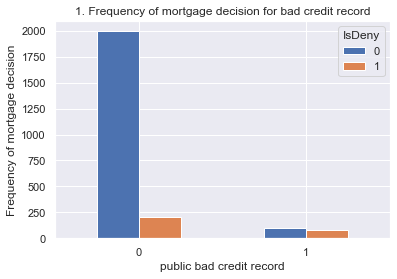

In [140]:
# IsBadCredit vs. deny
pd.crosstab(df06.IsBadCredit,df06.IsDeny).plot(kind='bar')
plt.title('1. Frequency of mortgage decision for bad credit record')
plt.xlabel('public bad credit record')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

The frequency of mortgage application decision depends a great deal on the public credit record. Thus, it can be a good predictor of the outcome variable.


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

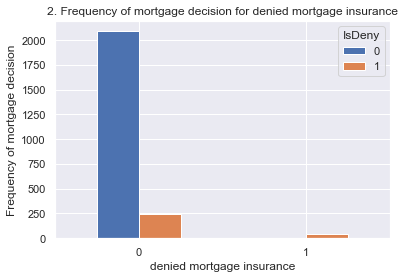

In [141]:
# IsDeniedMI vs. deny
pd.crosstab(df06.IsDeniedMI,df06.IsDeny).plot(kind='bar')
plt.title('2. Frequency of mortgage decision for denied mortgage insurance')
plt.xlabel('denied mortgage insurance')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Mortgage insurance seems a good predictor of the outcome variable.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

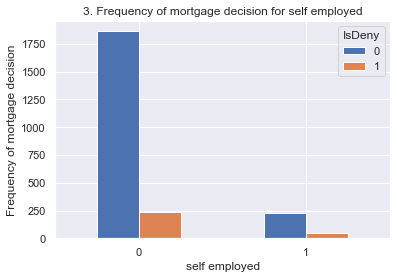

In [142]:
# IsSelf vs. deny
pd.crosstab(df06.IsSelf,df06.IsDeny).plot(kind='bar')
plt.title('3. Frequency of mortgage decision for self employed')
plt.xlabel('self employed')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Self employed or not might be a good predictor of the outcome variable.



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

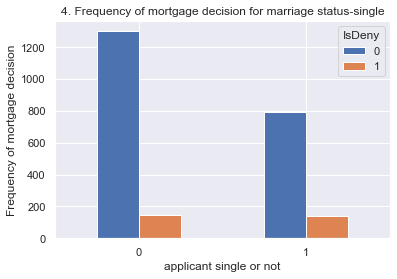

In [143]:
# IsSingle vs. deny
pd.crosstab(df06.IsSingle,df06.IsDeny).plot(kind='bar')
plt.title('4. Frequency of mortgage decision for marriage status-single')
plt.xlabel('applicant single or not')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Marriage status might be a good predictor of the outcome variable.



(array([0, 1]), <a list of 2 Text major ticklabel objects>)

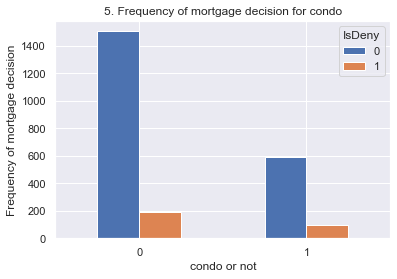

In [144]:
# IsCondo vs. deny
pd.crosstab(df06.IsCondo,df06.IsDeny).plot(kind='bar')
plt.title('5. Frequency of mortgage decision for condo')
plt.xlabel('condo or not')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Property type (condo/not condo) might be a good predictor of the outcome variable.


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

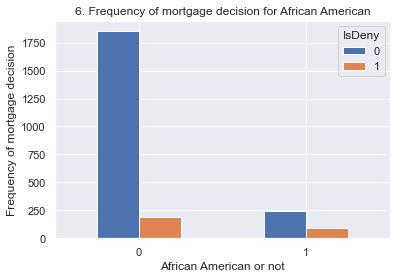

In [145]:
# IsAfricanAmerican vs. deny
pd.crosstab(df06.IsAfricanAmerican,df06.IsDeny).plot(kind='bar')
plt.title('6. Frequency of mortgage decision for African American')
plt.xlabel('African American or not')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

African American or not might be a good predictor of the outcome variable.


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

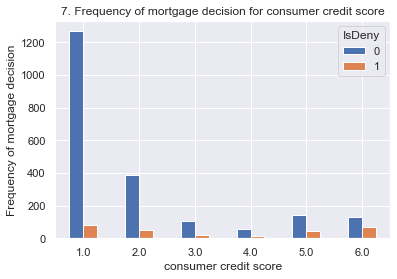

In [563]:
# ccs vd. deny
pd.crosstab(df06.ccs,df06.IsDeny).plot(kind='bar')
plt.title('7. Frequency of mortgage decision for consumer credit score')
plt.xlabel('consumer credit score')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Consumer credit score might be a good predictor of the outcome variable.



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

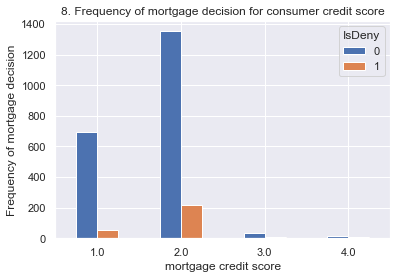

In [564]:
# mcs vd. deny
pd.crosstab(df06.mcs,df06.IsDeny).plot(kind='bar')
plt.title('8. Frequency of mortgage decision for consumer credit score')
plt.xlabel('mortgage credit score')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Mortgage credit score might be a good predictor of the outcome variable.



[]

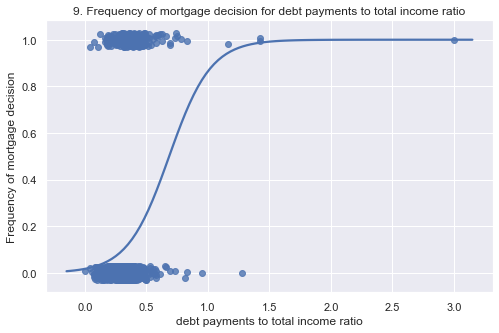

In [169]:
# dir vs. deny
plt.figure(figsize=(8, 5))
sns.regplot(x='dir', y='IsDeny', data=df06, y_jitter=0.03, logistic=True, ci=None)
plt.title('9. Frequency of mortgage decision for debt payments to total income ratio')
plt.xlabel('debt payments to total income ratio')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)
plt.plot()


Debt payments to total income ratio might be a good predictor of the outcome variable.



[]

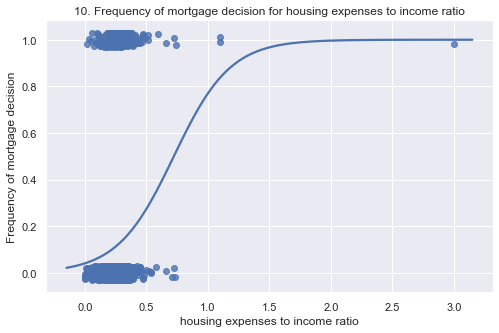

In [170]:
# hir vs. deny
plt.figure(figsize=(8, 5))
sns.regplot(x='hir', y='IsDeny', data=df06, y_jitter=0.03, logistic=True, ci=None)
plt.title('10. Frequency of mortgage decision for housing expenses to income ratio')
plt.xlabel('housing expenses to income ratio')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)
plt.plot()

Housing expenses to income ratio might be a good predictor of the outcome variable.



[]

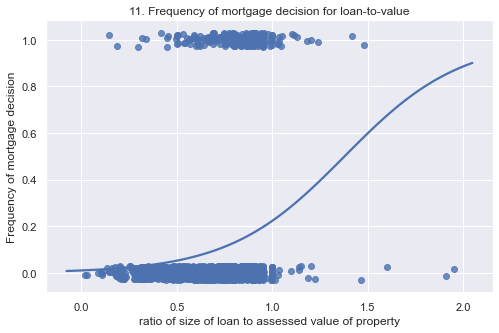

In [171]:
# hir vs. deny
plt.figure(figsize=(8, 5))
sns.regplot(x='lvr', y='IsDeny', data=df06, y_jitter=0.03, logistic=True, ci=None)
plt.title('11. Frequency of mortgage decision for loan-to-value')
plt.xlabel('ratio of size of loan to assessed value of property')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)
plt.plot()

Ratio of size of loan to assessed value of property may not be a good predictor of the outcome.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

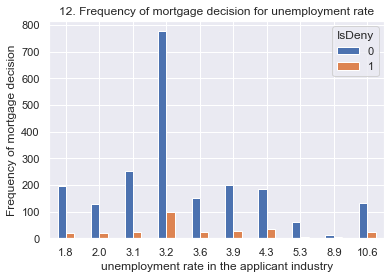

In [172]:
# uria vs. deny
pd.crosstab(df06['uria'].round(1),df06.IsDeny).plot(kind='bar')
plt.title('12. Frequency of mortgage decision for unemployment rate')
plt.xlabel('unemployment rate in the applicant industry')
plt.ylabel('Frequency of mortgage decision')
plt.xticks(rotation=0)

Employment rate in the applicant industry might be a good predictor of the outcome variable.


#### 2. Check correlation and the independence between the independent variables

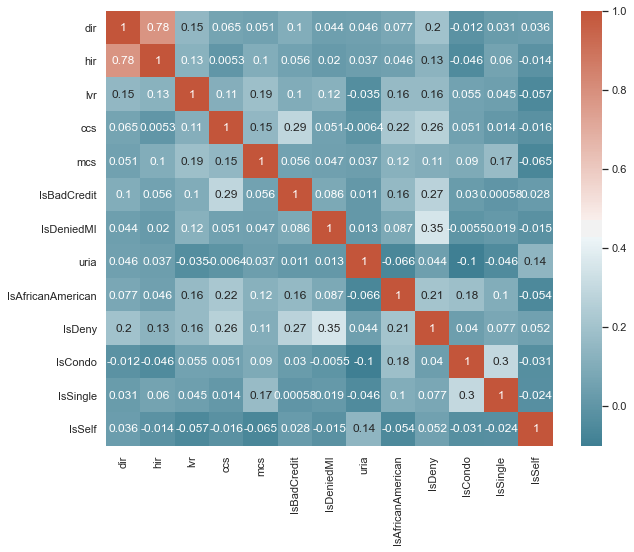

In [423]:
plt.figure(figsize=(10,8))

corr = df06.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


#### Findings:
>1. There's no feature having the correlation coefficient above 0.8. I'll use an absolute correlation coefficient of >0.7 among two or more predictors indicating the presence of multicollinearity.
>2. The independence between the independent variables is good, because this dataset contains no correlated features. 
>3. The highest correlation coefficient is 0.78, betweeb hir and dir.

***
### Step 5. Feature Selection

The classes of this dataset are imbalanced, and the ratio of no-deny to deny is 88:12. Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. Before checking feature importance, I need to balance the class distribution and normalize the dataset.

Most feature selection methods can be divided into three major buckets:
* **Filter based**: We specify some metric and based on that filter features. An example of such a metric could be correlation/chi-square.
* **Wrapper-based**: Wrapper methods consider the selection of a set of features as a search problem. Example: Recursive Feature Elimination
* **Embedded**: Embedded methods use algorithms that have built-in feature selection methods. For instance, Lasso and RF have their own feature selection methods.

In this study, I'll use Wrapper methods and Embedded methods to select features for Logistic Regression models. Two ways to rank features are by **recursive feature elimination (RFE)** and scikit Learn’s **SelectFromModels (SFM)**. https://towardsdatascience.com/a-look-into-feature-importance-in-logistic-regression-models-a4aa970f9b0f


#### 1. Over-sampling using SMOTE

`SMOTE` works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Researchers have found that balancing the data will to better classification models

SMOTE (Synthetic Minority Over-sampling Technique) is a type of over-sampling procedure that is used to correct the imbalances in the groups. This technique creates new data instances of the minority groups by copying existing minority instances and making small changes to them. This makes SMOTE great at amplifying signals that already exist in the minority groups, but won’t create new information for those groups.


In [432]:
# make a copy
df07 = df06.copy()

In [433]:
# Create X and y
X = df07.drop(['IsDeny'], axis=1)
y = df07[['IsDeny']]

In [434]:
# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (1904, 12) (1904, 1)
Testing dataset shape: (476, 12) (476, 1)


In [435]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns
X_resampled_test,y_resampled_test=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=X_resampled_test,columns=columns )
os_data_y= pd.DataFrame(data=y_resampled_test,columns=['IsDeny'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(X_resampled_test))
print("Number of no deny in oversampled data",len(y_resampled_test[y_resampled_test['IsDeny']==0]))
print("Number of deny",len(y_resampled_test[y_resampled_test['IsDeny']==1]))
print("Proportion of no deny data in oversampled data is ",len(y_resampled_test[y_resampled_test['IsDeny']==0])/len(X_resampled_test))
print("Proportion of deny data in oversampled data is ",len(y_resampled_test[y_resampled_test['IsDeny']==1])/len(X_resampled_test))


length of oversampled data is  3364
Number of no deny in oversampled data 1682
Number of deny 1682
Proportion of no deny data in oversampled data is  0.5
Proportion of deny data in oversampled data is  0.5


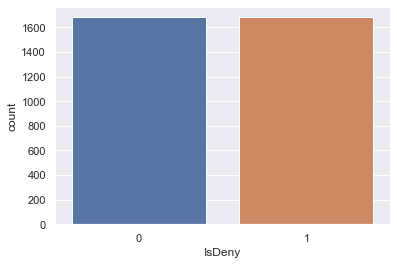

In [555]:
# observe that data has been balanced
sns.countplot(x='IsDeny', data=os_data_y)


The training dataset has been banlanced.

#### 2. Feature Importance - Recursive feature elimination

Next is RFE which is available in `sklearn.feature_selection.RFE`. 

Wrapper-based: Wrapper methods consider the selection of a set of features as a search problem. Example: Recursive Feature Elimination

RFE is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. To get a full ranking of features, just set the parameter n_features_to_select = 1.


In [437]:
from sklearn.feature_selection import RFE

#rank all features
rfe = RFE(logreg, n_features_to_select=1)
rfe.fit(os_data_X,os_data_y.values.ravel())


RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [441]:
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), os_data_X.columns)))


Features sorted by their rank:
[(1, 'dir'), (2, 'lvr'), (3, 'IsDeniedMI'), (4, 'IsBadCredit'), (5, 'IsAfricanAmerican'), (6, 'mcs'), (7, 'hir'), (8, 'IsCondo'), (9, 'IsSelf'), (10, 'ccs'), (11, 'IsSingle'), (12, 'uria')]


Above is the feature rank generated by the method of Recursive feature elimination.

#### 3. Feature Importance - SelectFromModel

The last method I'll use is `sklearn.feature_selection.SelectFromModel`, which selects the features by importance. This is an Embedded method, which uses algorithms that have built-in feature selection methods.


In [439]:
from sklearn.feature_selection import SelectFromModel

# feature extraction
smf = SelectFromModel(LogisticRegression(), max_features=12)

smf.fit(os_data_X,os_data_y.values.ravel())
feature_idx = smf.get_support()
#feature_name
embeded_lr_feature = os_data_X.loc[:,feature_idx].columns.tolist()

print(str(len(embeded_lr_feature)), 'selected features')


3 selected features


In [440]:
# print selected feature names
embeded_lr_feature

['dir', 'lvr', 'IsDeniedMI']

#### Findings:
>1. From the feature selection method of RFE, I got the sorted features by importance. I'll pick the top 8 features for a logistic regression model. They are (1, 'dir'), (2, 'lvr'), (3, 'IsDeniedMI'), (4, 'IsBadCredit'), (5, 'IsAfricanAmerican'), (6, 'mcs'), (7, 'hir'), (8, 'IsCondo').
>2. From the feature selection method of SelectFromModel, three features were selected. They are 'dir', 'lvr', and 'IsDeniedMI'. I'll use these three features in another logistic regression model. 



***
### Step 6. Regression Modeling 

4 different logistic regression models will be performed by using different features. I'll use train dataset to build models.

>* Model01 = full features: ('dir', 'hir', 'lvr', 'ccs', 'mcs', 'IsBadCredit', 'IsDeniedMI', 'uria', 'IsAfricanAmerican', 'IsCondo', 'IsSingle', 'IsSelf')

>* Model02 = top 8 features from RFE: ('dir','lvr','IsDeniedMI','IsBadCredit','IsAfricanAmerican','mcs', 'hir','IsCondo')

>* Model03 = features from SelectFromModel: ('dir','lvr', and 'IsDeniedMI')

>* Model04 = remove feature having not significant p value in the Model01. 


In [485]:
# merge the dataset
data_train = pd.concat([os_data_X, os_data_y], axis=1)

### Model 01:

The Model01 has all 12 features.

In [484]:
from patsy import dmatrices

# create dataframes with an intercept column
y_model01, X_model01 = dmatrices('IsDeny ~ dir + hir + lvr + ccs + mcs + IsBadCredit + \
IsDeniedMI + uria + IsAfricanAmerican + IsCondo + IsSingle + IsSelf',
                  data_train, return_type="dataframe")

logit_model01 = sm.Logit(y_model01,X_model01)
result01 = logit_model01.fit()

#check independent variable p values
print(result01.pvalues)

Optimization terminated successfully.
         Current function value: 0.541742
         Iterations 8
Intercept            1.411696e-70
dir                  1.495456e-21
hir                  5.172277e-01
lvr                  6.933813e-12
ccs                  4.903413e-33
mcs                  1.121299e-08
IsBadCredit          1.155248e-07
IsDeniedMI           3.752171e-11
uria                 1.955677e-03
IsAfricanAmerican    6.532152e-07
IsCondo              9.619814e-05
IsSingle             2.410773e-03
IsSelf               1.884141e-02
dtype: float64


In [508]:
from sklearn.linear_model import LogisticRegression

# train data
X_train01 = X_model01.drop(['Intercept'], axis=1)

# test dataset for Model01
X_test01 = X_test

# model
logreg01 = LogisticRegression()

# fit the model
logreg01.fit(X_train01, y_model01.values.ravel())

# prediction for test data
y_pred01 = logreg01.predict(X_test01)


#### Findings:
>1. The variable of 'hir' is not statistically significant to the model.
>2. I'll remove 'hir' from the model in the Model 04.


### Model 02

The Model02 has 8 features generated by the method of RFE: 'dir','lvr','IsDeniedMI','IsBadCredit','IsAfricanAmerican','mcs', 'hir','IsCondo'.

In [486]:
# create dataframes with an intercept column
y_model02, X_model02 = dmatrices('IsDeny ~ dir + lvr + hir +  mcs + IsBadCredit + \
IsDeniedMI + IsAfricanAmerican + IsCondo',
                  data_train, return_type="dataframe")

# instantiate a logistic regression model, and fit with X and y
logit_model02 = sm.Logit(y_model02,X_model02)
result02 = logit_model02.fit()

#check independent variable p values
print(result02.pvalues)

Optimization terminated successfully.
         Current function value: 0.566743
         Iterations 7
Intercept            9.316099e-68
dir                  1.775743e-24
lvr                  6.565352e-13
hir                  4.473548e-01
mcs                  1.206533e-16
IsBadCredit          9.083201e-18
IsDeniedMI           4.699307e-10
IsAfricanAmerican    1.040134e-14
IsCondo              1.148519e-05
dtype: float64


In [507]:
# train data
X_train02 = X_model02.drop(['Intercept'], axis=1)

# test dataset 
X_test02 = X_test[['dir','lvr','IsDeniedMI','IsBadCredit','IsAfricanAmerican','mcs', 'hir','IsCondo']]

# model
logreg02 = LogisticRegression()

# fit the model
logreg02.fit(X_train02, y_model02.values.ravel())

# prediction for test data
y_pred02 = logreg02.predict(X_test02)

For the Model 02, the variable of 'hir' is not statistically significant to the model.

### Model 03
The Model03 has three features from SelectFromModel: 'dir','lvr', and 'IsDeniedMI'. 

In [487]:
# create dataframes with an intercept column
y_model03, X_model03 = dmatrices('IsDeny ~ dir + lvr + IsDeniedMI',
                  data_train, return_type="dataframe")

# instantiate a logistic regression model, and fit with X and y
logit_model03 = sm.Logit(y_model03,X_model03)
result03 = logit_model03.fit()

#check independent variable p values
print(result03.pvalues)

Optimization terminated successfully.
         Current function value: 0.607419
         Iterations 7
Intercept     1.389373e-70
dir           2.033645e-42
lvr           2.057024e-29
IsDeniedMI    6.370000e-10
dtype: float64


In [509]:
# train data
X_train03 = X_model03.drop(['Intercept'], axis=1)

# test dataset 
X_test03 = X_test[['dir','lvr', 'IsDeniedMI']]

# model
logreg03 = LogisticRegression()

# fit the model
logreg03.fit(X_train03, y_model03.values.ravel())

# prediction for test data
y_pred03 = logreg03.predict(X_test03)

For the Model 03, all three variable are statistically significant to the model.

### Model04

The Model04 has 11 features. The features of 'hir' that is not statistically significant to the model01 will be removed.

In [488]:
# create dataframes with an intercept column
y_model04, X_model04 = dmatrices('IsDeny ~ dir + lvr + ccs + mcs + IsBadCredit + \
IsDeniedMI + uria + IsAfricanAmerican + IsCondo + IsSingle + IsSelf',
                  data_train, return_type="dataframe")

# instantiate a logistic regression model, and fit with X and y
logit_model04 = sm.Logit(y_model04,X_model04)
result04 = logit_model04.fit()

#check independent variable p values
print(result04.pvalues)

Optimization terminated successfully.
         Current function value: 0.541804
         Iterations 8
Intercept            2.909498e-72
dir                  1.569469e-31
lvr                  8.438507e-12
ccs                  3.982522e-33
mcs                  1.266998e-08
IsBadCredit          1.049328e-07
IsDeniedMI           3.640850e-11
uria                 1.935198e-03
IsAfricanAmerican    6.867733e-07
IsCondo              1.110345e-04
IsSingle             2.485644e-03
IsSelf               2.046721e-02
dtype: float64


In [510]:
# train data
X_train04 = X_model04.drop(['Intercept'], axis=1)

# test dataset 
X_test04 = X_test.drop(['hir'], axis=1)

# model
logreg04 = LogisticRegression()

# fit the model
logreg04.fit(X_train04, y_model04.values.ravel())

# prediction for test data
y_pred04 = logreg04.predict(X_test04)


***
### Step 6. Evaluate Models and Select a Final Model

In [489]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

>#### Create a function for Confusion Matrix

In [514]:
import itertools

#https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=8)
    plt.xlabel('Predicted label', labelpad=8)
    plt.title(title, y=1.02)
    plt.tight_layout()


>#### Create a function for model_report

In [493]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

>#### Create a function for roc_auc_score and ROC Curve

In [ ]:
label='AUC=%0.2f'%auc_score

In [542]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%auc)
    plt.legend(loc=4)
    plt.show()
    pass

In [544]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label='AUC ROC Curve with Area Under the curve=%0.2f'%auc)
    plt.legend(loc=4)
    plt.show()
    pass

#### 1. Model Evaluation - confusion matrix

The Confusion Matrix describes the predictions that the model made as either True (correct) or False (wrong). It compares these to the real truth. A perfect model would have only True Positives and True Negatives.

For the plots below, there are two class labels: approved and denied. The x-axis is labeled Predicted label - meaning our model's predictions given X_test. The y-axis is labeled True label - meaning the class labels for our X_test observations. The model made a total of 476 predictions. 


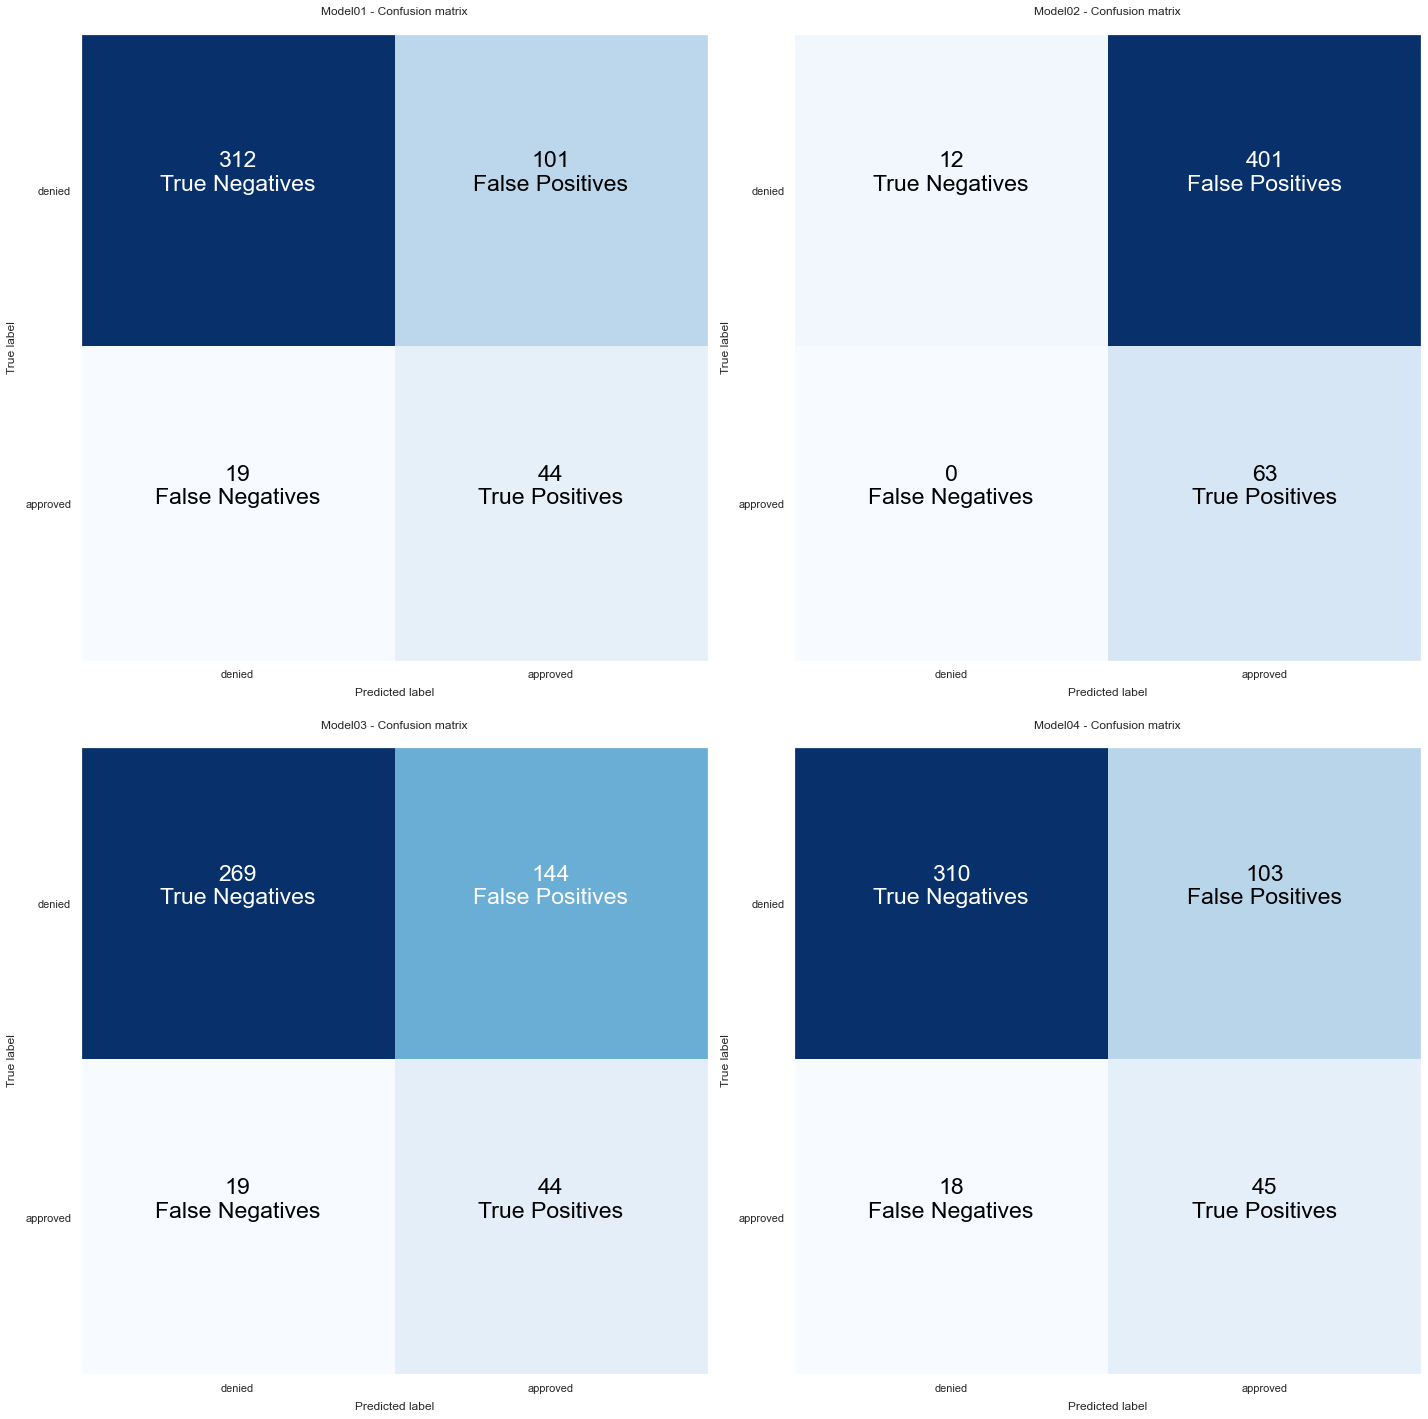

In [527]:
# Compute confusion matrix
cnf_matrix01 = confusion_matrix(y_test, y_pred01);
np.set_printoptions(precision=2);

class_names = ["denied", "approved"]

# Plot non-normalized confusion matrix
plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.grid(False)
plot_confusion_matrix(cnf_matrix01, classes=class_names, title='Model01 - Confusion matrix')

# Compute confusion matrix
cnf_matrix02 = confusion_matrix(y_test, y_pred02);
np.set_printoptions(precision=2);

class_names = ["denied", "approved"]

# Plot non-normalized confusion matrix
plt.subplot(222)
plt.grid(False)
plot_confusion_matrix(cnf_matrix02, classes=class_names, title='Model02 - Confusion matrix')

# Compute confusion matrix
cnf_matrix03 = confusion_matrix(y_test, y_pred03);
np.set_printoptions(precision=2);

class_names = ["denied", "approved"]

# Plot non-normalized confusion matrix
plt.subplot(223)
plt.grid(False)
plot_confusion_matrix(cnf_matrix03, classes=class_names, title='Model03 - Confusion matrix')

# Compute confusion matrix
cnf_matrix04 = confusion_matrix(y_test, y_pred04);
np.set_printoptions(precision=2);

class_names = ["denied", "approved"]

# Plot non-normalized confusion matrix
plt.subplot(224)
plt.grid(False)
plot_confusion_matrix(cnf_matrix04, classes=class_names, title='Model04 - Confusion matrix')



#### 2. Model Evaluation - model_report

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.



In [533]:
print("Model 01:")
generate_model_report(y_test, y_pred01)
print("-------------------------------------------")

print("Model 02:")
generate_model_report(y_test, y_pred02)
print("-------------------------------------------")

print("Model 03:")
generate_model_report(y_test, y_pred03)
print("-------------------------------------------")

print("Model 04:")
generate_model_report(y_test, y_pred04)
print("-------------------------------------------")


Model 01:
Accuracy =  0.7478991596638656
Precision =  0.30344827586206896
Recall =  0.6984126984126984
F1 Score =  0.42307692307692313
-------------------------------------------
Model 02:
Accuracy =  0.15756302521008403
Precision =  0.13577586206896552
Recall =  1.0
F1 Score =  0.23908918406072108
-------------------------------------------
Model 03:
Accuracy =  0.657563025210084
Precision =  0.23404255319148937
Recall =  0.6984126984126984
F1 Score =  0.350597609561753
-------------------------------------------
Model 04:
Accuracy =  0.7457983193277311
Precision =  0.30405405405405406
Recall =  0.7142857142857143
F1 Score =  0.4265402843601896
-------------------------------------------


#### 3. Model Evaluation - auc_roc_curve

I'll use a ROC curve to measure the accuracy of a classification prediction. Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. 

For ROC curve, a perfect model would be a vertical line up the y-axis (100% True Positives, 0% False Positives).

AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. The larger the area under ROC curve, higher will be the accuracy.

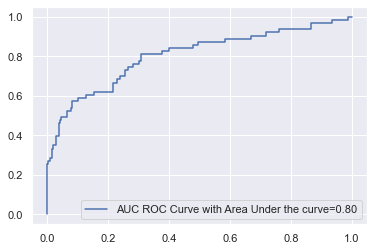

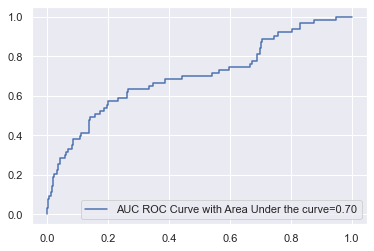

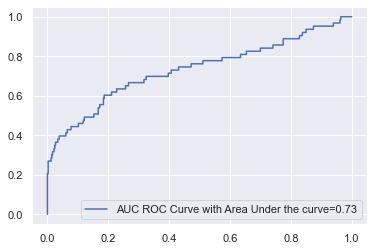

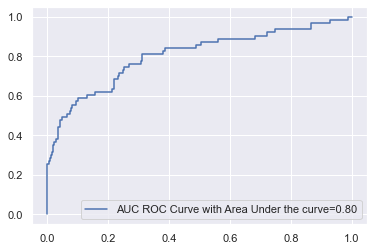

In [548]:
generate_auc_roc_curve(logreg01, X_test01)
generate_auc_roc_curve(logreg02, X_test02)
generate_auc_roc_curve(logreg03, X_test03)
generate_auc_roc_curve(logreg04, X_test04)


#### Summary:
>1 .The original model with all features resulted in an “area under the curve” (AUC) of 0.8 and an F1 score of 42%.
>2. The model with features selected by RFE : AUC: 0.7; F1: 24%. Performed a little worse than the full model.
>3. The model with features selected by SFM: AUC: 0.73; F1: 35%. Performed a little worse than the full model.
>4. The model the removing features having p values <.05 from the full model: AUC: 0.80; F1: 43%. Best performance.


**Interpretation (Model 04):**

Out of of 63 no denied samples:

45 were correctly predicted as approved by the model (true positives).

18 were wrongly predicted as denied by the model (false negatives).

And out of 413 non-default samples:

310 were correctly predicted as denied by the model (true negatives).

103 were wrongly predicted as approved by the model (false positives).

In this case, the final Logistic Regression model predicts the classes with an accuracy score of 0.75 ,which is considerably quite accurate. When the final Logistic Regression model predicted mortgage applicants are going to be denied, that applicants have 30% of the time. If there are applicants who have denied in the test set and the Logistic Regression model can identify it 71% of the time.


### Step 7. Interpret the Final model

In [556]:
print(result04.summary())

                           Logit Regression Results                           
Dep. Variable:                 IsDeny   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3352
Method:                           MLE   Df Model:                           11
Date:                Sun, 05 Jul 2020   Pseudo R-squ.:                  0.2183
Time:                        20:23:20   Log-Likelihood:                -1822.6
converged:                       True   LL-Null:                       -2331.7
Covariance Type:            nonrobust   LLR p-value:                2.283e-211
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.6323      0.313    -17.978      0.000      -6.246      -5.018
dir                   5.9861      0.512     11.682      0.000       4.982       6.990
lvr                   1.

#### Findings:
>1. All p-values are less than .05, meaning that all features in the momdel are significant in determining the denied mortgage.
>2. The coefficients are in log-odds terms. Thelog odds is not intuitive in it's interpretation. I'll convert this to odds ratio and interpret the model. To convert the log odds coefficients and confidence intervals, I need to take the exponential of the values.


In [562]:
# https://www.pythonfordatascience.org/logistic-regression-python/

model_odds = pd.DataFrame(np.exp(result04.params), columns= ['OR'])
model_odds['z-value']= result04.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result04.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.003580,2.909498e-72,0.001938,0.006616
dir,397.843154,1.569469e-31,145.731565,1086.100844
lvr,6.570750,8.438507e-12,3.828422,11.277431
ccs,1.331703,3.982522e-33,1.270784,1.395542
mcs,1.643246,1.266998e-08,1.384867,1.949832
IsBadCredit,2.321322,1.049328e-07,1.701930,3.166132
IsDeniedMI,30.837740,3.640850e-11,11.170720,85.130250
uria,1.061010,1.935198e-03,1.022018,1.101490
IsAfricanAmerican,1.758706,6.867733e-07,1.407353,2.197777
IsCondo,0.685272,1.110345e-04,0.565758,0.830033


#### INTERPRETATION:
>1. The current overal model is significant to predict a mortgage decision, F(11, 3352) < 0.01. 
>2. The odds of being denied increases by a factor of 397.84 for every unit increase in debt-to-income ratio;
>3. The odds of being denied increases by a factor of 6.57 for every unit increase in loan-to-value ratio;
>4. The odds of being denied increases by a factor of 1.33 for every unit increase in consumer credit score (a low value being a good score);
>5. The odds of being denied increases by a factor of 1.64 for every unit increase in mortgage credit score (a low value being a good score);
>6. The odds of being denied for those applying mortgage with a public bad credit record is 2.32 times that of those applying mortgage with a public good credit record;
>7. The odds of being denied for those applying mortgage with a denied mortgage insurance is 30.83 times that of those applying mortgage with the approved mortgage insurance;
>8. The odds of being denied increases by a factor of 1.06 for every unit increase in unemployment rate in the applicant's industry;
>9. The odds of being denied for African American applying mortgage African American is 1.76  times that of applicants from other ethinity;
>10. The odds of being denied for those applying mortgage for a condo is 0.69 times that of those applying mortgage for other property type;
>11. The odds of being denied for a single applying mortgage is 1.3  times that of married couple applying mortgage;
>12. The odds of being denied for self employed applying mortgage increases by a factor of 0.7 
times that of employed applying mortgage;

### Step 8. Conclusion

Based on the final model, the top 2 reasons that mortgage applicantion will be denied are high debt payments to total income ratio and denied mortgage insurance, which were also demonstrated in my demoain knowledge research.

In this dataset, only the 'housing expenses to income ratio' feature was deleted since it cannot significantly predict the dependent variable. It looks reasonable because housing expenses to income ratio is not as important as debt-to-income ratios, especially for a condo.  When the applicant has a stable job with a decent salary, good cash flow for 20% down payment, and good credit score, mortgage applicantion would have a higher chance to get approved. 
